In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

In [61]:
df = pd.read_csv('../adult.csv')
df
# Target - income 
# Incomes/ salary prediction based on demographics and other features 
# describing people

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Classification task - as target can only be either <= 50 or >50;
After data frame modification, income-target can be represented by new column - is_income_over_50k as int type

In [62]:
df['is_income_over_50k'] = df['income'] == '>50K'
df["is_income_over_50k"] = df["is_income_over_50k"].astype(int)
# income is already converted to int type, so we can drop it;
# education column has corresponding enumerated column - educational-num, 
# so dropping as well; according to previous EDA analysis, 
# fnlwgt indicates small correlation to target with high error value,
# thus also dropping it#
df_mod_1 = df.drop(['income', 'education', 'fnlwgt'], axis=1)
df_mod_1

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,is_income_over_50k
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot:title={'center':'Incomes over 50K'}, ylabel='Frequency'>

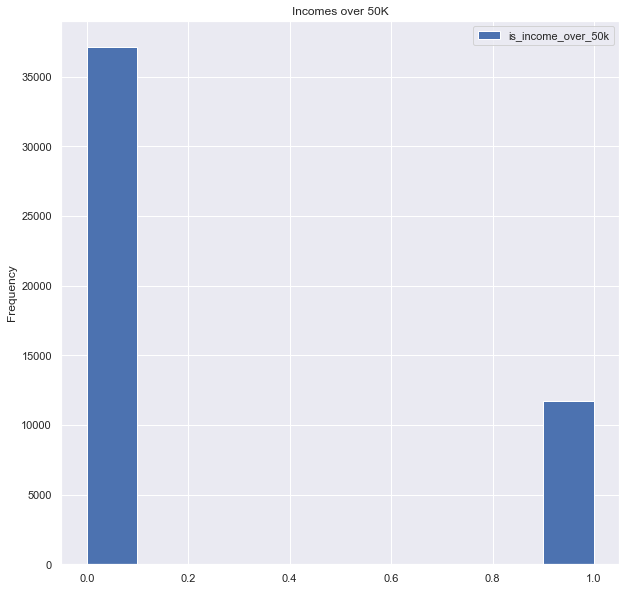

In [63]:
df_mod_1[['is_income_over_50k']].plot.hist(title = 'Incomes over 50K')
# Distribution (by data count) between under/over 50K is not equal

Data preprocessing/ filtration + cleaning(?)

In [64]:
print(df.apply(lambda col: col.unique()))
# there is "bad" data (?) in workclass, native-country

age                   [25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 3...
workclass             [Private, Local-gov, ?, Self-emp-not-inc, Fede...
fnlwgt                [226802, 89814, 336951, 160323, 103497, 198693...
education             [11th, HS-grad, Assoc-acdm, Some-college, 10th...
educational-num       [7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5,...
marital-status        [Never-married, Married-civ-spouse, Widowed, D...
occupation            [Machine-op-inspct, Farming-fishing, Protectiv...
relationship          [Own-child, Husband, Not-in-family, Unmarried,...
race                  [Black, White, Asian-Pac-Islander, Other, Amer...
gender                                                   [Male, Female]
capital-gain          [0, 7688, 3103, 6418, 7298, 3908, 14084, 5178,...
capital-loss          [0, 1721, 1876, 2415, 1887, 625, 1977, 2057, 1...
hours-per-week        [40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 4...
native-country        [United-States, ?, Peru, Guatemala, Mexico

In [65]:
print('Init data volume:',len(df_mod_1.index))
df_mod_2 = df_mod_1.loc[~df_mod_1['workclass'].isin(['?'])]
df_mod_2 = df_mod_1.loc[~df_mod_1['occupation'].isin(['?'])]
# removing rows with (?) values - ~2.8K#
y = df_mod_2['is_income_over_50k']
df_mod_2 = df_mod_2.drop('is_income_over_50k', axis=1)
# extracting target (labels) into separate data_frame,
# and dropping income binary column in init dataframe# 
print('After clean-up:',len(df_mod_2.index))
# converting gender into int data as well#
df_mod_2['gender'] = df_mod_2['gender'] == 'Male'
df_mod_2['gender'] = df_mod_2['gender'].astype(int)

Init data volume: 48842
After clean-up: 46033


One-hot encoding particular categorical data

In [66]:
# one-hot encoding for 2 columns + dropping 2 newly created columns,
# as there are almost no rows #
df_mod_2 = pd.get_dummies(df_mod_2, columns=['workclass', 'occupation'])
df_mod_2 = df_mod_2.drop(['occupation_Armed-Forces', 'workclass_Without-pay'], axis=1)

df_mod_2.columns

Index(['age', 'educational-num', 'marital-status', 'relationship', 'race',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')

Divide possible features: martial status + relationships into binary (married/has-children)

In [67]:
df_mod_2['is_married'] = df_mod_2['marital-status'].str.startswith('Married')
df_mod_2['is_married'] = df_mod_2['is_married'].astype(int)
df_mod_2 = df_mod_2.drop(['marital-status'], axis=1)
# divide marital status into married ones and not
# + converting to numerical data#

Additional EDA (continue division)

,age,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,is_married,has_children
0,25,7,Black,1,0,0,40,United-States,0,0,...,1,0,0,0,0,0,0,0,0,1
1,38,9,White,1,0,0,50,United-States,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,12,White,1,0,0,40,United-States,0,1,...,0,0,0,0,1,0,0,0,1,0
3,44,10,Black,1,7688,0,40,United-States,0,0,...,1,0,0,0,0,0,0,0,1,0
5,34,6,White,1,0,0,30,United-States,0,0,...,0,1,0,0,0,0,0,0,0,0


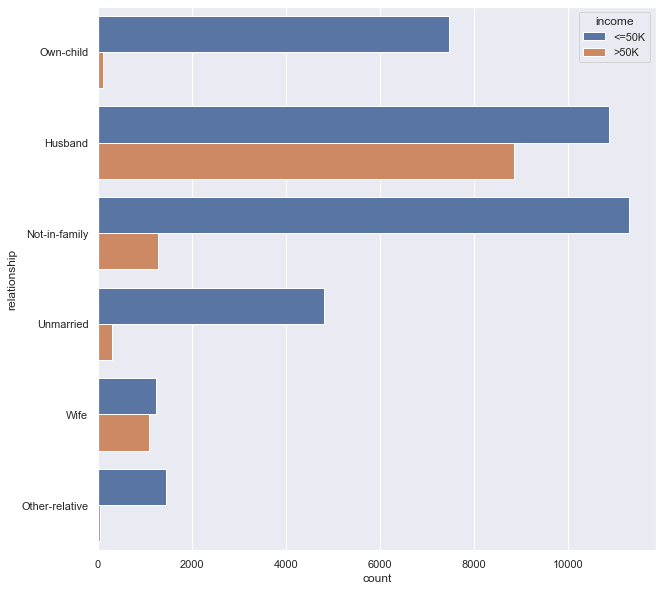

In [68]:
sns.countplot(y='relationship', hue='income', data=df)
df_mod_2['has_children'] = df_mod_2['relationship'] == 'Own-child'
df_mod_2['has_children'] = df_mod_2['has_children'].astype(int)
df_mod_2 = df_mod_2.drop(['relationship'], axis=1)
# divide relationship into just having children or not, because
# for other values the distribution related to income is pretty similar
# to marital status column
# + converting to numerical data
df_mod_2.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,is_married,has_children,is_white,from_US
0,25,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,38,9,1,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
2,28,12,1,0,0,40,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1
3,44,10,1,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,34,6,1,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


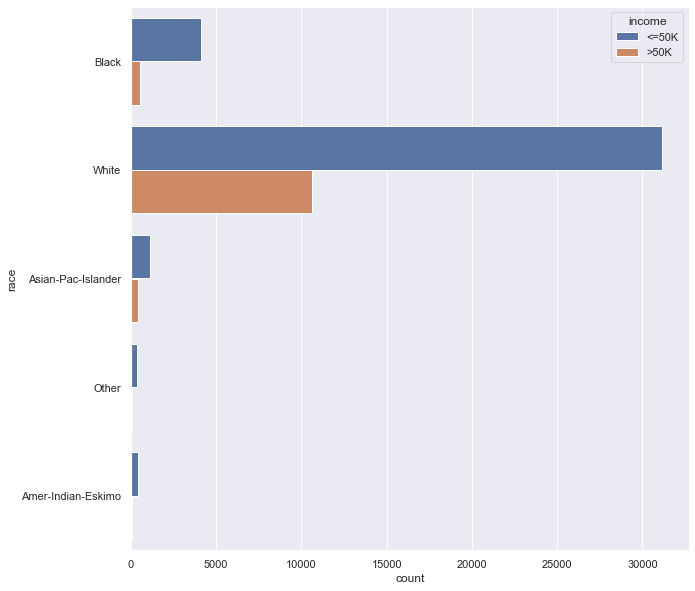

In [69]:
sns.countplot(y='race', hue='income', data=df)

df_mod_USA_plus_race = df_mod_2
df_mod_USA_plus_race['is_white'] = df_mod_USA_plus_race['race'] == 'White'
df_mod_USA_plus_race['is_white'] = df_mod_USA_plus_race['is_white'].astype(int)
df_mod_USA_plus_race['from_US'] = df_mod_USA_plus_race['native-country'] == 'United-States'
df_mod_USA_plus_race['from_US'] = df_mod_USA_plus_race['from_US'].astype(int)

df_mod_USA_plus_race = df_mod_USA_plus_race.drop(['race', 'native-country'], axis=1)
df_mod_minimal = df_mod_2.drop(['race', 'native-country'], axis=1)

# on this step, there is major separation after additional EDA:
# minimal data frame without native country and race columns at all
# (as there are not equal distributions between these columns categories,
# most of the data belong to just one of the possible values);
# full data frame with extracted numerical columns (is_white, from_US),
# as that was the biggest categories in above mentioned columns

df_mod_minimal.head()

1. Minimal dataframe processing

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# features standartizing#
X = scaler.fit_transform(df_mod_minimal)

In [71]:
from sklearn.model_selection import train_test_split
# features/tagret division into train - test ones
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
# K nearest neighbours classifier model#
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8247458510730733


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=12)
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print('Metrics values for each fold:', scores)
print('Average on cross validation:', np.mean(scores))

Metrics values for each fold: [0.8271967  0.82795699 0.82567612 0.83032805 0.8262003 ]
Average on cross validation: 0.8274716308971668


In [75]:
from sklearn.model_selection import GridSearchCV

# firstly, already tried range (1, 17), as curve indicated raising 
# trend, the range was shifted, however 17 neighbours value still
# remains the best one #

knn_params={'n_neighbors': np.arange(15, 50, 2)}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47,
       49])},
             scoring='accuracy')

In [76]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
pd.DataFrame(knn_grid.cv_results_).T

{'n_neighbors': 17}
KNeighborsClassifier(n_neighbors=17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.006812,0.005186,0.006239,0.005422,0.005808,0.006739,0.00521,0.009306,0.005814,0.005662,0.006555,0.004828,0.005007,0.008037,0.006705,0.005277,0.005432,0.004407
std_fit_time,0.00074,0.000733,0.00116,0.001058,0.000734,0.000843,0.001181,0.005271,0.001031,0.000436,0.001384,0.000387,0.00091,0.002088,0.002315,0.000648,0.000488,0.000499
mean_score_time,3.107233,3.069305,3.078879,3.084373,3.076394,3.092865,3.271394,3.353186,3.370762,3.260203,3.260927,3.16863,3.283032,3.268976,3.334826,3.405038,3.348817,3.227229
std_score_time,0.284963,0.279684,0.275625,0.270896,0.26458,0.268254,0.448061,0.333814,0.222999,0.335918,0.218142,0.240923,0.355589,0.41497,0.304854,0.262053,0.253082,0.282735
param_n_neighbors,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49
params,{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19},{'n_neighbors': 21},{'n_neighbors': 23},{'n_neighbors': 25},{'n_neighbors': 27},{'n_neighbors': 29},{'n_neighbors': 31},{'n_neighbors': 33},{'n_neighbors': 35},{'n_neighbors': 37},{'n_neighbors': 39},{'n_neighbors': 41},{'n_neighbors': 43},{'n_neighbors': 45},{'n_neighbors': 47},{'n_neighbors': 49}
split0_test_score,0.835047,0.836206,0.835047,0.833744,0.833599,0.83302,0.83302,0.834323,0.833454,0.831716,0.83244,0.833888,0.832151,0.832875,0.83302,0.834178,0.833599,0.832585
split1_test_score,0.83244,0.832295,0.83273,0.834178,0.83302,0.833309,0.833888,0.832875,0.831571,0.833454,0.831716,0.831282,0.831282,0.831571,0.83244,0.832151,0.832006,0.832006
split2_test_score,0.835482,0.832585,0.83244,0.833599,0.832875,0.832585,0.832585,0.831716,0.832585,0.830268,0.829833,0.830847,0.832295,0.831137,0.830558,0.831427,0.831427,0.831137
split3_test_score,0.828965,0.834178,0.830992,0.831137,0.830268,0.831861,0.832295,0.829689,0.828965,0.830268,0.831427,0.830992,0.829399,0.827082,0.827661,0.82824,0.827806,0.828675


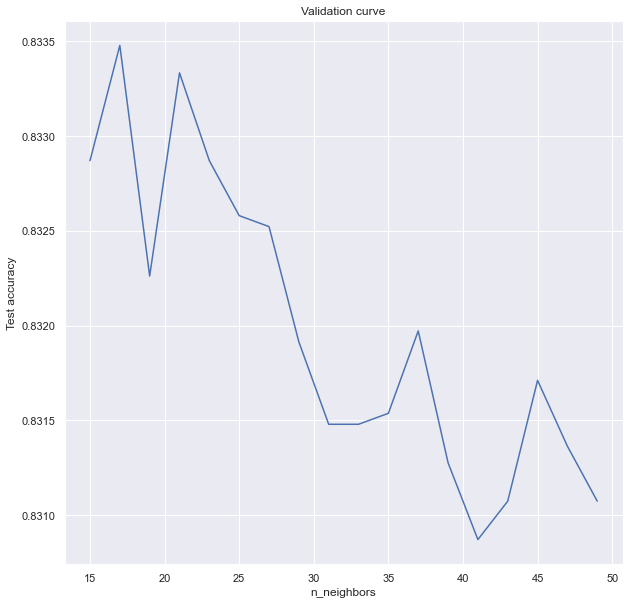

In [77]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

Check weights and metric (minkovsky - p value; weight - distance)

In [78]:
knn_metrical = KNeighborsClassifier(17, 'distance')
knn_params={'p': np.linspace(1, 10, 10)}

knn_grid = GridSearchCV(knn_metrical, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
pd.DataFrame(knn_grid.cv_results_).T

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass weights=distance as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.006001,0.005625,0.005799,0.006656,0.006882,0.006538,0.005612,0.006143,0.005023,0.005306
std_fit_time,0.000897,0.001039,0.000981,0.001102,0.000859,0.001061,0.001005,0.000722,0.000671,0.001001
mean_score_time,6.319767,3.123061,77.773352,75.523892,80.643173,77.12197,75.732191,261.607495,76.305108,74.377442
std_score_time,0.469236,0.267013,5.820764,4.453636,2.001189,2.305346,0.445025,245.690161,4.325569,1.823836
param_p,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
params,{'p': 1.0},{'p': 2.0},{'p': 3.0},{'p': 4.0},{'p': 5.0},{'p': 6.0},{'p': 7.0},{'p': 8.0},{'p': 9.0},{'p': 10.0}
split0_test_score,0.829544,0.829978,0.829544,0.828096,0.828385,0.826792,0.825923,0.826792,0.825489,0.825489
split1_test_score,0.823751,0.823172,0.821434,0.822882,0.822448,0.823606,0.823027,0.822448,0.821868,0.821289
split2_test_score,0.829399,0.825778,0.825344,0.82462,0.82462,0.82433,0.822158,0.822013,0.822882,0.822737
split3_test_score,0.823027,0.822882,0.821289,0.821434,0.820999,0.819841,0.819696,0.820275,0.819551,0.819696


Radius classifier

In [79]:
rnn  = RadiusNeighborsClassifier()
rnn_params={'radius': np.arange(7, 13, 2)} 

rnn_grid = GridSearchCV(rnn, rnn_params, cv=4, scoring='accuracy')
rnn_grid.fit(X_train, y_train)
pd.DataFrame(rnn_grid.cv_results_).T
# radius = 7 (the smallest in range) shows the best value, 
# under 7 there was an error, that no neighbours have found
# nevertheless, radius classifier indicates lower prediction accuracy#

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

,0,1,2
mean_fit_time,0.004848,0.004759,0.00502
std_fit_time,0.00098,0.00044,0.000692
mean_score_time,3.607524,5.080738,5.559873
std_score_time,0.341287,0.049852,0.150669
param_radius,7,9,11
params,{'radius': 7},{'radius': 9},{'radius': 11}
split0_test_score,0.771869,0.759008,0.757502
split1_test_score,NaN,0.760051,0.758429
split2_test_score,0.771521,0.759472,0.757502
split3_test_score,0.773954,0.759819,0.758892


2. Full dataframe processing (US native/ race)

In [80]:
# same actions as for minimal data frame#
scaler_plus = StandardScaler()
X_plus = scaler_plus.fit_transform(df_mod_USA_plus_race)
X_train, X_valid, y_train, y_valid = train_test_split(X_plus, y, test_size=0.25, random_state=32)
knn_plus = KNeighborsClassifier(17)
knn_plus.fit(X_train, y_train)
y_pred = knn_plus.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
# full data with country and race reveals better result (~1% higher)#

0.8366495785906681


In [81]:

knn_params={'n_neighbors': np.arange(3, 28, 2)}

knn_grid = GridSearchCV(knn_plus, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
pd.DataFrame(knn_grid.cv_results_).T
# n_neighbours = 17 gives the best accuracy

,0,1,2,3,4,5,6,7,8,9,10,11,12
mean_fit_time,0.006243,0.006097,0.00622,0.00601,0.007492,0.007014,0.006022,0.006226,0.006345,0.005962,0.006663,0.005809,0.006234
std_fit_time,0.000958,0.00132,0.00039,0.000906,0.001468,0.001034,0.001401,0.002054,0.001405,0.001174,0.001752,0.000979,0.001152
mean_score_time,2.162222,3.09329,3.090579,3.117558,3.140747,89.21563,3.357309,3.368616,3.30326,3.288236,3.274237,3.341557,3.28786
std_score_time,0.006844,0.067823,0.075365,0.075394,0.099278,172.147584,0.302084,0.085893,0.091901,0.102205,0.090583,0.120021,0.074398
param_n_neighbors,3,5,7,9,11,13,15,17,19,21,23,25,27
params,{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 11},{'n_neighbors': 13},{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19},{'n_neighbors': 21},{'n_neighbors': 23},{'n_neighbors': 25},{'n_neighbors': 27}
split0_test_score,0.813179,0.824185,0.82462,0.826358,0.827661,0.831861,0.834323,0.828965,0.831137,0.830413,0.829254,0.827661,0.827516
split1_test_score,0.814482,0.826647,0.831571,0.83273,0.833164,0.834033,0.834902,0.832875,0.832006,0.830558,0.829978,0.831861,0.831427
split2_test_score,0.814917,0.824475,0.824909,0.827082,0.829689,0.832006,0.831282,0.833164,0.833454,0.834178,0.834613,0.832295,0.830702
split3_test_score,0.816365,0.825054,0.826068,0.827227,0.829254,0.829833,0.828096,0.834178,0.831427,0.833599,0.831427,0.831282,0.83302


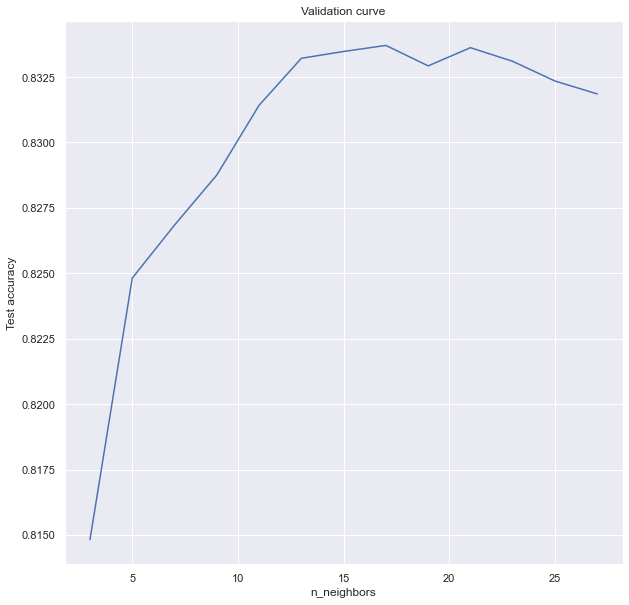

In [82]:
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [83]:
knn_metrical_plus = KNeighborsClassifier(17, 'distance')
knn_params={'p': np.linspace(1, 10, 10)}

knn_grid_plus = GridSearchCV(knn_metrical_plus, knn_params, cv=3, scoring='accuracy')
knn_grid_plus.fit(X_train, y_train)
pd.DataFrame(knn_grid_plus.cv_results_).T
# as well as for minimal df, the lower p, the better accuracy

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass weights=distance as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.005332,0.003998,0.005334,0.006104,0.006654,0.005362,0.006223,0.005268,0.007424,0.005551
std_fit_time,0.000471,0.000003,0.000464,0.000947,0.000459,0.000513,0.000876,0.000522,0.00097,0.000781
mean_score_time,7.414541,4.105918,488.443087,280.957587,119.016892,116.857688,110.086094,111.915437,113.961623,113.157041
std_score_time,0.175828,0.362694,310.861046,243.13952,1.105409,2.981204,2.186437,0.324226,0.844796,0.98813
param_p,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
params,{'p': 1.0},{'p': 2.0},{'p': 3.0},{'p': 4.0},{'p': 5.0},{'p': 6.0},{'p': 7.0},{'p': 8.0},{'p': 9.0},{'p': 10.0}
split0_test_score,0.822819,0.819864,0.818387,0.816736,0.815346,0.816041,0.815172,0.814824,0.814651,0.814564
split1_test_score,0.827338,0.824644,0.824644,0.823166,0.822819,0.821515,0.821255,0.821429,0.822037,0.820907
split2_test_score,0.827685,0.827077,0.825252,0.823514,0.822906,0.823862,0.822558,0.821689,0.821863,0.821602
mean_test_score,0.825947,0.823862,0.822761,0.821139,0.820357,0.820473,0.819662,0.819314,0.819517,0.819024


In [84]:
rnn_plus  = RadiusNeighborsClassifier()

rnn_params={'radius': np.arange(7, 13, 2)} 

rnn_grid_plus = GridSearchCV(rnn_plus, rnn_params, cv=3, scoring='accuracy')
rnn_grid_plus.fit(X_train, y_train)
pd.DataFrame(rnn_grid_plus.cv_results_).T
# radius classifier for full dataframe works literally the same as for minimal
# even a bit worse (overall accuracy again lower than that for KNN)

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

,0,1,2
mean_fit_time,0.005602,0.006481,0.004692
std_fit_time,0.000433,0.000741,0.00047
mean_score_time,4.801927,6.532876,8.09655
std_score_time,0.476683,0.899959,0.434076
param_radius,7,9,11
params,{'radius': 7},{'radius': 9},{'radius': 11}
split0_test_score,NaN,NaN,0.757994
split1_test_score,0.772593,0.759472,0.758081
split2_test_score,0.76903,0.758863,0.757908
mean_test_score,NaN,NaN,0.757994
